# **`pycoco`** and **`CoCo`** 'recon' files

___

## Introduction

**`CoCo`** generates as an output, a series of files in `$COCO_ROOT_DIR/recon/`. In this notebook, we will interact with the reconstructed light curve file, the `$SNNAME.dat` and the `$SNNAME.stat` file.

In [83]:
from __future__ import print_function ## Force python3-like printing

%matplotlib inline
from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

reload(pcc) ## FOR DEV

<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.py'>

In [65]:
L = pcc.LCfitClass()

In [66]:
L.recon_directory

'/Users/berto/Code/CoCo/recon'

In [67]:
# recon_filename = os.path.abspath(os.path.join(L.recon_directory, 'SN2005bf.dat'))
# recon_filename = os.path.abspath(os.path.join(L.recon_directory, 'SN2011dh.dat'))
recon_filename = os.path.abspath(os.path.join(L.recon_directory, 'SN2011dh_Bessell.dat'))


print(recon_filename)
L.load_formatted_phot(recon_filename)
L.unpack()

/Users/berto/Code/CoCo/recon/SN2011dh_Bessell.dat


In [68]:
L.data

OrderedDict([('BessellB', <Table length=132>
                MJD            flux          ...       flux_upper             flux_lower      
                 d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
              float64        float64         ...        float64                float64        
              ------- ---------------------- ... ---------------------- ----------------------
              55701.0            4.68428e-18 ...            5.68893e-18            3.67963e-18
              55702.0            7.70185e-18 ...            9.23922e-18            6.16448e-18
              55703.0            1.26445e-17 ...           1.498023e-17           1.030877e-17
              55704.0            2.07196e-17 ...            2.42376e-17            1.72016e-17
              55705.0            3.38671e-17 ...           3.910987e-17           2.862433e-17
              55706.0            5.51776e-17 ...            6.28891e-17            4.74661e-17
     

In [69]:
L.data_filters

OrderedDict([('BessellB', <pycoco.FilterClass instance at 0x110e9ea28>),
             ('BessellI', <pycoco.FilterClass instance at 0x1097df638>),
             ('BessellR', <pycoco.FilterClass instance at 0x110f51a70>),
             ('BessellV', <pycoco.FilterClass instance at 0x1094c9b48>)])

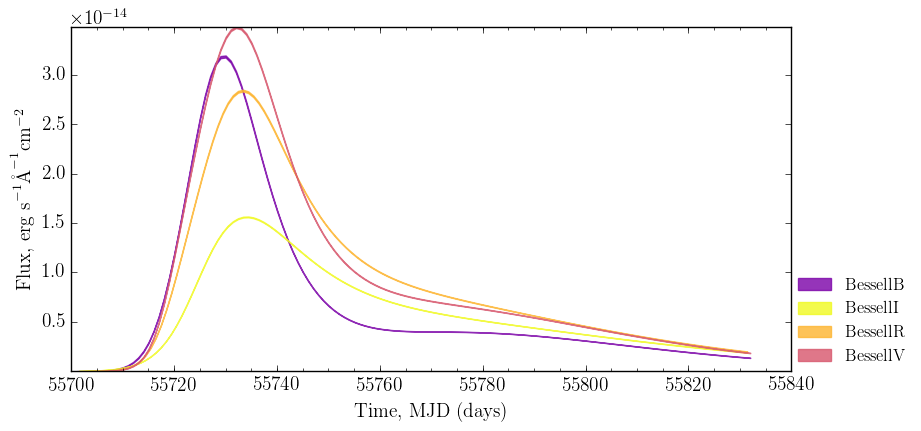

In [70]:
L.plot()

You didn't supply a directory, so using self.recon_directory
Reading /Users/berto/Code/CoCo/recon/SN2011dh_Bessell_55715.000000.spec
{'_meta': OrderedDict([('filename', '/Users/berto/Code/CoCo/recon/SN2011dh_Bessell_55715.000000.spec')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x110aae650>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux','flux_err')>, 'primary_key': None}


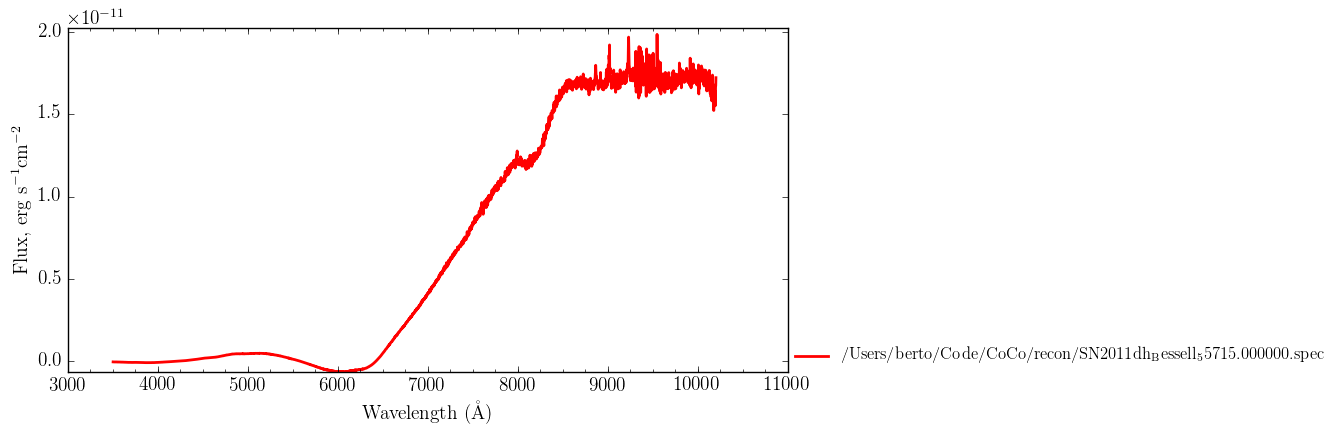

In [71]:
recon_spec_path = '/Users/berto/Code/CoCo/recon/SN2011dh_Bessell_55715.000000.spec'
mS = pcc.specfitClass()
mS.load(filename = recon_spec_path)
mS.plot()

You didn't supply a directory, so using self.recon_directory
Reading /Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55715.000000.spec
{'_meta': OrderedDict([('filename', '/Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55715.000000.spec')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x1105efb50>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux','flux_err')>, 'primary_key': None}


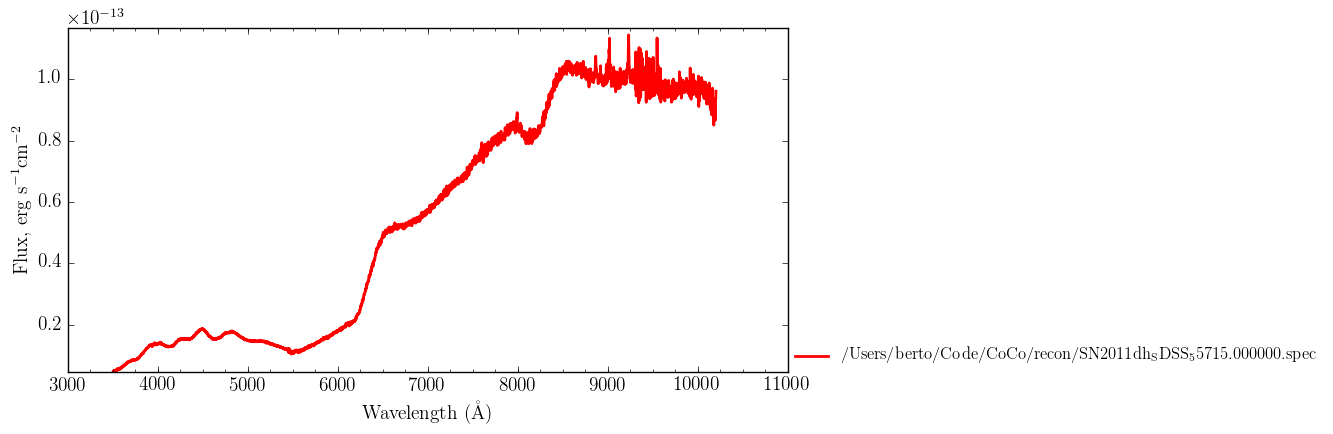

In [72]:
recon_spec_path = '/Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55715.000000.spec'
mS = pcc.specfitClass()
mS.load(filename = recon_spec_path)
mS.plot()

You didn't supply a directory, so using self.recon_directory
Reading /Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55737.000000.spec
{'_meta': OrderedDict([('filename', '/Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55737.000000.spec')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x110698510>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux','flux_err')>, 'primary_key': None}


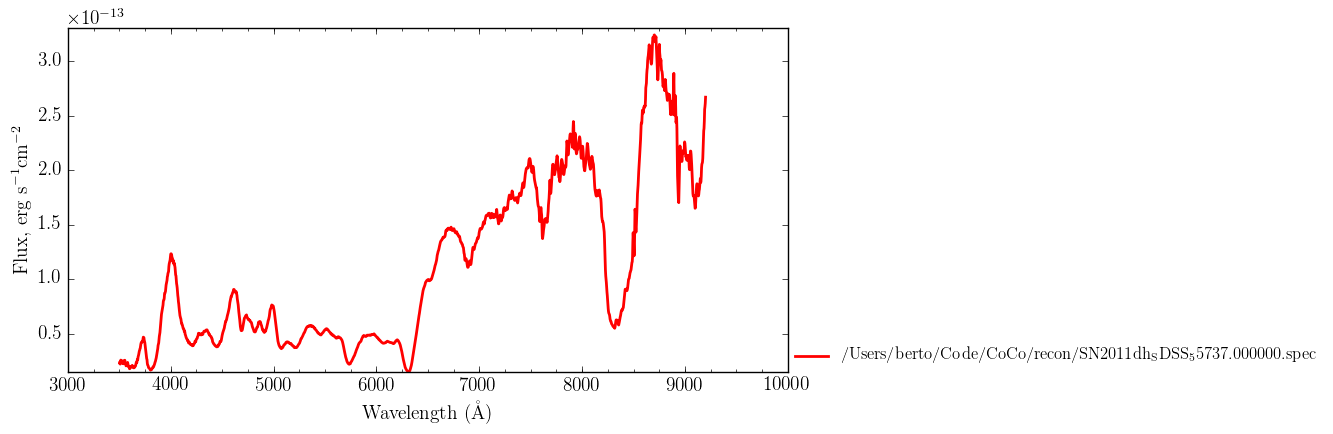

In [73]:
# recon_spec_path = '/Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55715.000000.spec'
recon_spec_path = '/Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55737.000000.spec'
mS = pcc.specfitClass()
mS.load(filename = recon_spec_path)
mS.plot()
# spec_table = Table.read(recon_spec_path, format = fmt, names = names)
# spec_table.

You didn't supply a directory, so using self.data_directory
Reading /Users/berto/Code/CoCo/data/spec/SN2011dh/SN2011dh-2011-06-25-NOT-ALFOSC-Grism_4-Grism_5.dat
{'_meta': OrderedDict([('filename', '/Users/berto/Code/CoCo/data/spec/SN2011dh/SN2011dh-2011-06-25-NOT-ALFOSC-Grism_4-Grism_5.dat')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x1105efc50>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux')>, 'primary_key': None}


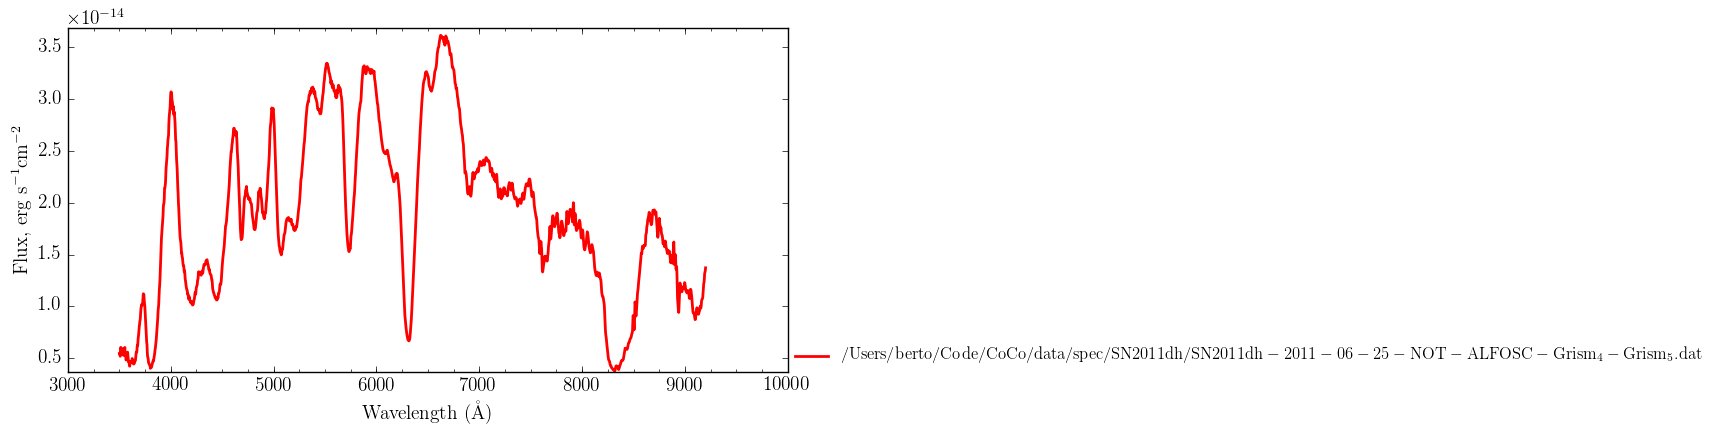

In [74]:
obs_spec_path = '/Users/berto/Code/CoCo/data/spec/SN2011dh/SN2011dh-2011-06-25-NOT-ALFOSC-Grism_4-Grism_5.dat'
S = pcc.SpectrumClass()
S.load(filename = obs_spec_path)
S.plot()

1.10310563111e-13 1.89593692564e-14


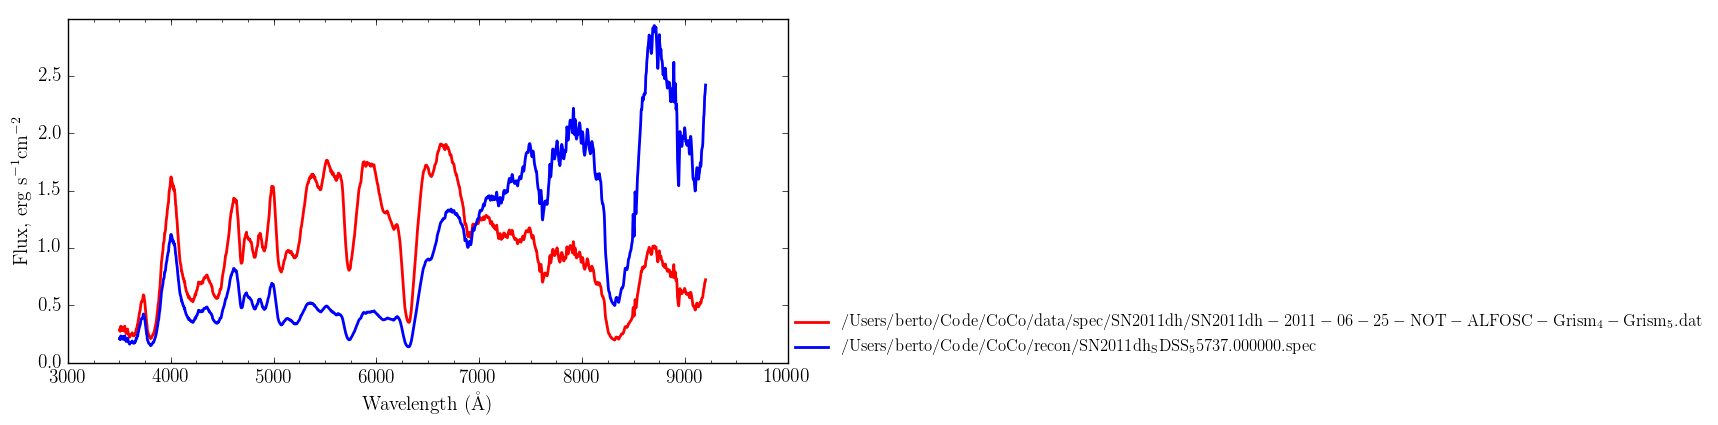

In [75]:
reload(pcc)
pcc.compare_spec(S, mS)

In [81]:
# sn = pcc.SNClass('SN2009jf')
sn = pcc.SNClass('SN2005hg')

sn.name

'SN2005hg'

/Users/berto/Code/verbose-enigma/testdata/lc/SN2005hg.dat


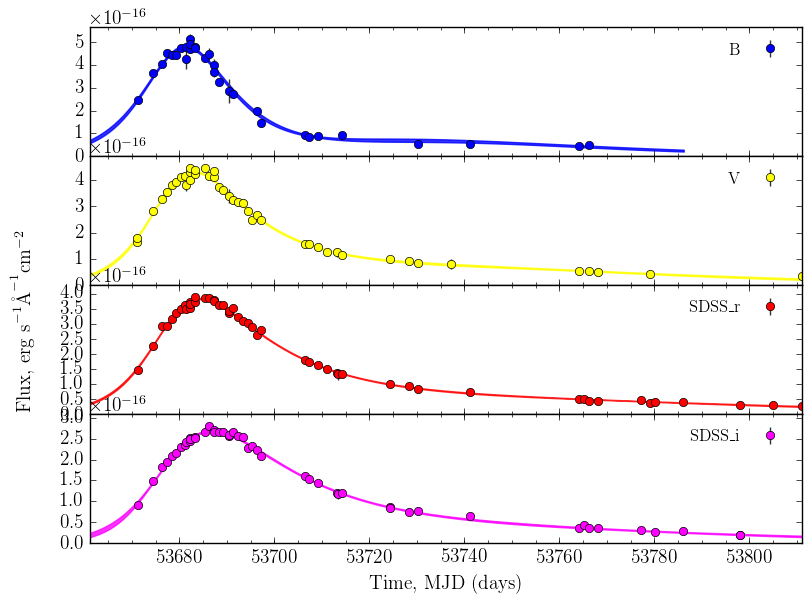

In [82]:
sn.load_phot()
# recon_filename = os.path.abspath(os.path.join('/Users/berto/Code/CoCo/recon/', 'SN2009jf.dat'))
recon_filename = os.path.abspath(os.path.join('/Users/berto/Code/CoCo/recon/', 'SN2005hg.dat'))

sn.get_lcfit(recon_filename)
sn.plot_lc()